Practico 2021

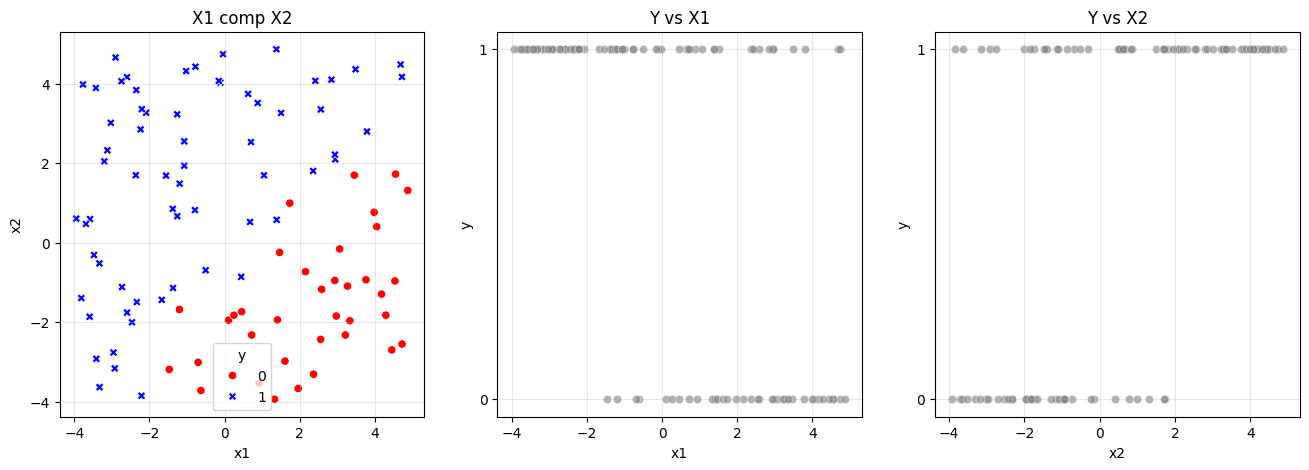

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A
np.random.seed(42) # semilla 
n = 100
a = -2
b = 2
c = 3

# X1 y X2 variables uniformes en [-4, 5]
x1 = np.random.uniform(-4, 5, n)
x2 = np.random.uniform(-4, 5, n)

# y=exp(a*x1+b*x2+c + rnorm(n))
nor = np.random.normal(0, 1, n)
y_odds = np.exp(a * x1 + b * x2 + c + nor)

# y = y / (1 + y)
probs = y_odds / (1 + y_odds)

# y=rbinom(n,1,y)
y = np.random.binomial(1, probs)


# B
plt.figure(figsize=(16, 5))
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Nube de puntos X1 e X2
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='x1', y='x2', hue='y', palette={0: 'red', 1: 'blue'}, style='y')
plt.title('X1 comp X2')
plt.grid(True, alpha=0.3)

# Y en función de X1
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='x1', y='y', color='gray', alpha=0.6)
plt.title('Y vs X1')
plt.yticks([0, 1])
plt.grid(True, alpha=0.3)

# Y en función de X2
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='x2', y='y', color='gray', alpha=0.6)
plt.title('Y vs X2')
plt.yticks([0, 1])
plt.grid(True, alpha=0.3)

plt.show()

In [3]:
import statsmodels.api as sm

# C

X_train = df[['x1', 'x2']]
X_train = sm.add_constant(X_train) # Agrega la constante
y_train = df['y']
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

#resumen estadístico
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.088584
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Nov 2025   Pseudo R-squ.:                  0.8644
Time:                        16:08:14   Log-Likelihood:                -8.8584
converged:                       True   LL-Null:                       -65.342
Covariance Type:            nonrobust   LLR p-value:                 2.948e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6687      1.272      2.883      0.004       1.175       6.163
x1            -2.8834      0

Al analizar el resumen del modelo, se ve que los coeficientes estimados son x1 = -2.88 y x2 = 2.93, que se acercan bastante a los valores reales que usamos para la simulación (-2 y 2). De igual manera se estima c = 2.93, que se acerca a 3. Además, los p-valores son prácticamente cero, lo que confirma que son estadísticamente significativas y aportan información para predecir Y.

In [8]:
from sklearn.metrics import confusion_matrix

# D

yhat = result.predict(X_train)

# Convierto con margen 0.5 
prediction_class = (yhat > 0.5).astype(int)


# Matriz de Confusión
cm = confusion_matrix(y_train, prediction_class)
cm_df = pd.DataFrame(cm, 
                     index=['Real 0', 'Real 1'], 
                     columns=['Pred 0', 'Pred 1'])
print("Matriz de Confusión")
print(cm_df)

bien = cm[0,0] + cm[1,1]
total = cm.sum()
print(f"\nAccuracy: {bien}/{total} ({bien/total:.2%})")

# Ver algunas probabilidades vs realidad para chequear
print("\nEjemplos de 5 predicciones:")
comparison = pd.DataFrame({'Real': y_train, 'Probabilidad': yhat, 'Predicción': prediction_class})
print(comparison.head())

Matriz de Confusión
        Pred 0  Pred 1
Real 0      34       2
Real 1       2      62

Accuracy: 96/100 (96.00%)

Ejemplos de 5 predicciones:
   Real  Probabilidad  Predicción
0     0      0.004405           0
1     0      0.012109           0
2     0      0.000726           0
3     1      0.795703           1
4     1      1.000000           1


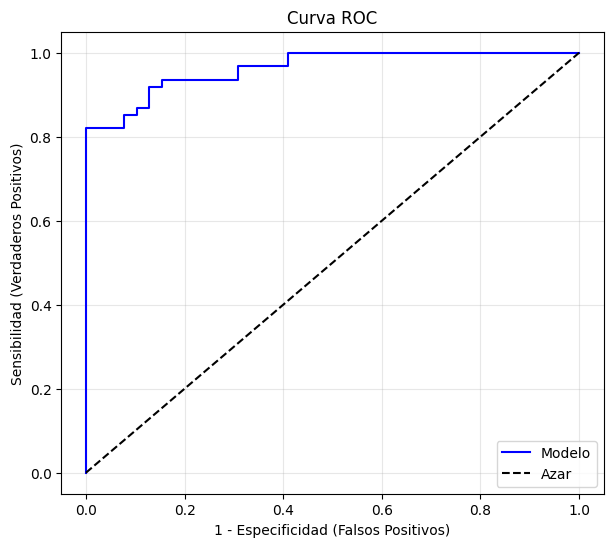

In [11]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# E

# nueva muestra n=100

np.random.seed(999) # Importante  
n_test = 100
x1_new = np.random.uniform(-4, 5, n_test)
x2_new = np.random.uniform(-4, 5, n_test)

nor_new = np.random.normal(0, 1, n_test)
y_odds_new = np.exp(a * x1_new + b * x2_new + c + nor_new)
probs_new = y_odds_new / (1 + y_odds_new)
y_new = np.random.binomial(1, probs_new)

df_test = pd.DataFrame({'const': 1, 'x1': x1_new, 'x2': x2_new, 'y': y_new})

# Predeciccion
y_prob_test = result.predict(df_test[['const', 'x1', 'x2']])

# Calculo las metricas (0,1,0.01)
thresholds = np.arange(0, 1.01, 0.01)
tpr_list = [] # Verdaderos Positivos
fpr_list = [] # Falsos Positivos

for t in thresholds:
    # Si la probabilidad > t, predecimos 1, sino 0
    y_pred_t = (y_prob_test >= t).astype(int)
    
    # Matriz de confusión
    # Predijo 1 y era 1
    tp = np.sum((y_pred_t == 1) & (df_test['y'] == 1))
    # Predijo 0 y era 1
    fn = np.sum((y_pred_t == 0) & (df_test['y'] == 1))
    # Predijo 0 y era 0
    tn = np.sum((y_pred_t == 0) & (df_test['y'] == 0))
    # Predijo 1 y era 0
    fp = np.sum((y_pred_t == 1) & (df_test['y'] == 0))
    
    # Calcular Sensibilidad y Especificidad
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    tpr_list.append(sens)
    fpr_list.append(1 - spec)

# Curva ROC
plt.figure(figsize=(7, 6))
# step es para la escalera
plt.step(fpr_list, tpr_list, where='post', color='blue', label='Modelo')
plt.plot([0, 1], [0, 1], 'k--', label='Azar') # Línea diagonal
plt.xlabel('1 - Especificidad (Falsos Positivos)')
plt.ylabel('Sensibilidad (Verdaderos Positivos)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\raulm\AppData\Local\Temp\ipykernel_3988\1233335889.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Azar (AUC=0.5)')


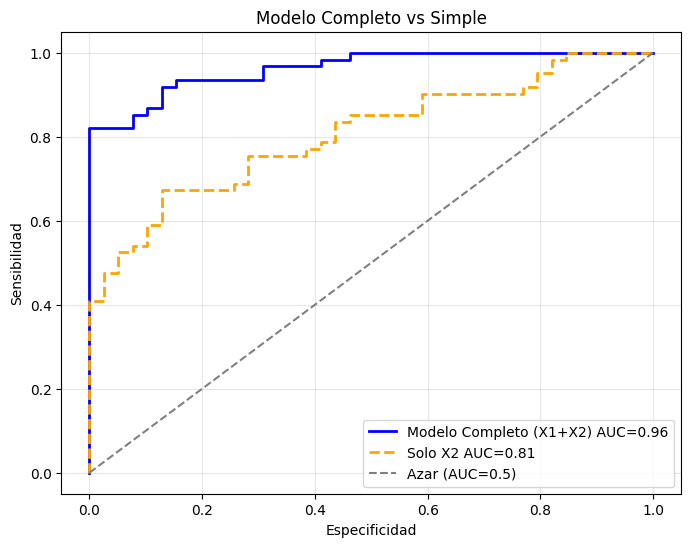

In [ ]:
from sklearn.metrics import roc_curve, auc

# F

# X2
# datos de entrenamiento originales (NO los de la parte E)
X_train_simple = df[['x2']]
X_train_simple = sm.add_constant(X_train_simple)

logit_simple = sm.Logit(df['y'], X_train_simple)
res_simple = logit_simple.fit(disp=0) 
X_test_simple = df_test[['const', 'x2']]
y_prob_simple = res_simple.predict(X_test_simple)

# Curvas ROC
fpr_full, tpr_full, _ = roc_curve(df_test['y'], y_prob_test)
auc_full = auc(fpr_full, tpr_full)

# Modelo Simple
fpr_simple, tpr_simple, _ = roc_curve(df_test['y'], y_prob_simple)
auc_simple = auc(fpr_simple, tpr_simple)

# curvas superpuestas
plt.figure(figsize=(8, 6))

# Curva Modelo Completo
plt.step(fpr_full, tpr_full, where='post', color='blue', lw=2, 
         label=f'Modelo Completo (X1+X2) AUC={auc_full:.2f}')

# Curva Modelo Simple
plt.step(fpr_simple, tpr_simple, where='post', color='orange', linestyle='--', lw=2,
         label=f'Solo X2 AUC={auc_simple:.2f}')

plt.plot([0, 1], [0, 1], 'k--', color='gray', label='Azar')

plt.xlabel('Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Modelo Completo vs Simple')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

El modelo completo usando X1 y X2 es superior porque su curva tiene un área mayor (0.96). El modelo simple usando solo X2 pierde capacidad de predicción y eso se refleja en un área menor (0.81).

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

#M Mismos datos que antes 
X_train = df[['x1', 'x2']]
y_train = df['y']

X_test = df_test[['x1', 'x2']]
y_test = df_test['y']

# Modelos
modelos = {
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB()
}

print("RESULTADOS DE CADA MODELO:\n")

# Entrenar y evaluar
for nombre, modelo in modelos.items():
    # Entrenar
    modelo.fit(X_train, y_train)
    
    # Predecir
    preds = modelo.predict(X_test)
    
    # Evaluar
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    
    print(f"{nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Matriz de Confusión:\n{cm}\n")

RESULTADOS DE CADA MODELO:

KNN (k=3)
Accuracy: 0.8800
Matriz de Confusión:
[[33  6]
 [ 6 55]]

LDA
Accuracy: 0.8700
Matriz de Confusión:
[[35  4]
 [ 9 52]]

QDA
Accuracy: 0.8700
Matriz de Confusión:
[[32  7]
 [ 6 55]]

Naive Bayes
Accuracy: 0.8500
Matriz de Confusión:
[[29 10]
 [ 5 56]]



In [17]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

modelos_finales = {
    "SVM (Kernel Lineal)": SVC(kernel='linear', probability=True),
    "SVM (Kernel Radial)": SVC(kernel='rbf', probability=True),
    "CART (Árbol Simple)": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

print("RESULTADOS DE LOS MODELOS:\n")

for nombre, modelo in modelos_finales.items():
    # Entrenar
    modelo.fit(X_train, y_train)
    
    # Predecir
    preds = modelo.predict(X_test)
    
    # Evaluar
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    
    print(f"{nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Matriz de Confusión:\n{cm}\n")

RESULTADOS DE LOS MODELOS:

SVM (Kernel Lineal)
Accuracy: 0.9000
Matriz de Confusión:
[[34  5]
 [ 5 56]]

SVM (Kernel Radial)
Accuracy: 0.8700
Matriz de Confusión:
[[32  7]
 [ 6 55]]

CART (Árbol Simple)
Accuracy: 0.8900
Matriz de Confusión:
[[37  2]
 [ 9 52]]

Random Forest
Accuracy: 0.8700
Matriz de Confusión:
[[33  6]
 [ 7 54]]

